## Tarea: General case: technology and demographic change (TAREA: semana 27 con nota)

Part 1. Consider a production function $A_tF(K_t,L_t)=A_tK_t^\alpha L_t^{1-\alpha}$. With a productivity growth rate of g.This allows us some conveniences for the stationary model. Therefore, the capital motion law is:

$$K_{t+1}=(1-\delta)K_t + sA_tF(K_t,L_t)$$

Using $\frac{A_{t+1}-A_t}{A_t}=g$ and $\frac{L_{t+1}-L_t}{L_t}=n$ and considering $k_t=\frac{K_t}{A_tL_t}$
1. Derive a theoretical function for $k_{t+1}=g(k_{t})$ where $g(k_{t})$ also depends on $n$ and $g$
2. Derive a theoretical function for the steady state of capital such tha $k^*=h(k^*)$ whereh$k^*$ also depends on $n$ and $g$
3. Write a function in Julia to determine  $k_{t+1}=g(k_{t})$ for any grid of $k_t$ and any set of coefficients (use the ones in the lectures)
4. Write a function in Julia to determine the steady state of $k^*=h(k^*)$. 
5. Simulate in Julia  $k_{t+1}=g(k_{t})$ and TEST it converges to the value predicted by $h(k^*)$.
6. Using  $k_{t+1}=g(k_{t})$ in 3, simulate convergence over time for different values of initial capital $k_0$
7. Using  $k_{t+1}=g(k_{t})$ in 3, simulate convergence over time for different values of initial capital $k_0$ assesing the implications of different values of $n$, more specifically, $n=0, n=0.1, n=1$. Explain the intution



Preguta 1

Expresamos $$A_{t+1} = (1 + g)A_t$$ y $$L_{t+1} = (1 + n)L_t$$
Ahora dividimos entre $A_{t+1}$ y $L_{t+1}$ para poder expresar la ley del movimiento del capital en terminos de $k_t$
Nos queda: $$\frac{K_{t+1}}{A_{t+1}L_{t+1}} = \frac{(1 - \delta)K_t}{A_{t+1}L_{t+1}} + \frac{sA_tK_t^{\alpha} L_t^{1-\alpha}}{A_{t+1}L_{t+1}} $$
Ahora reeplazamos las relaciones de $A_{t+1}$ y $L_{t+1}$ en $K_{t+1}$
nos queda: $$\frac{K_{t+1}}{(1 + g)A_t(1 + n)L_t} = \frac{(1 - \delta)K_t}{(1 + g)A_t(1 + n)L_t} + \frac{sA_tK_t^{\alpha} L_t^{1-\alpha}}{(1 + g)A_t(1 + n)L_t} $$
Reescribimos en terminos de $k_t$, y simplificamos para obtenes la ley del movimiento del capital en función de $k_t$,
por lo tanto, nos queda como: $$k_{t+1}= \frac{(1 - \delta)k_t}{(1 + g)(1 + n)} + \frac{sk_t^{\alpha}}{(1 + g)(1 + n)}$$




Pregunta 2

Para el estado estacionario sabes que $k_{t+1} = k_t = k^*$

Por lo tanto, tenemos que $$ k^*= \frac{(1 - \delta)k^*}{(1 + g)(1 + n)} + \frac{s(k^*)^{\alpha}}{(1 + g)(1 + n)}$$
despejamos $k^*$ y reorganizamos, nos queda: $$ k^* {(1 + g)(1 + n)}= {(1 - \delta)k^*}+ {s(k^*)^{\alpha}}$$
Agrupando los $k^*$, tenemos $$(1+g)(1+n)k^* - (1-\delta)k^* = s(k^*)^{\alpha} $$
$$k^*[(1+g)(1+n) - (1-\delta)] = s(k^*)^{\alpha}$$
$$\frac{k^*}{(k^*)^{\alpha}} = \frac{s}{(1+g)(1+n) - (1-\delta)}$$
$$ (k^*)^{1-\alpha} = \frac{s}{(1+g)(1+n) - (1-\delta)}$$
Ahora multiplicamos por $(  )^{\frac{1}{1-\alpha}}$, nos queda: $$k^* = \left[\frac{s}{(1+g)(1+n) - (1-\delta)}\right]^{\frac{1}{1-\alpha}}$$

In [16]:
#3. 
using Plots, Parameters

function params(; A=2.0, s=0.3, α=0.3, δ=0.4, x0=0.25, kmin=0.0, kmax=3.0, N=10_000,
                  g=0.01, n=0.01, )
    kgrid = range(kmin, kmax, length=N)
    t = range(1,100,N)
    return (A=A, s=s, α=α, δ=δ, x0=x0, kmin=kmin, kmax=kmax, kgrid=kgrid, t=t, g=g, n=n)
end

function g(p, k_t)
    @unpack s, A, g, n, δ, α = p
    return ((1-δ)*k_t + s*(k_t)^α)/((1+g)*(1+n))
end


g (generic function with 1 method)

In [17]:
#4.
function kstar(p)
    @unpack s, A, g, n, δ, α = p
    return (s/(((1+g)*(1+n))-(1-δ)))^(1/(1 - α))
end

kstar (generic function with 1 method)

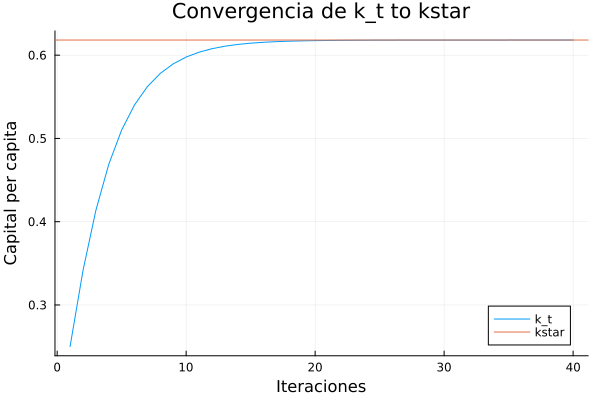

In [18]:
#5. 
# simulación de la convergencia hacia k^*
function simulate(p, tol=1e-6, max_iter=1000)
    @unpack x0 = p
    k_t = x0
    k_s = kstar(p)
    
    k_valores = [k_t]
    iter = 0

    while abs(k_t - k_s) > tol && iter < max_iter
        k_t = g(p, k_t)
        push!(k_valores, k_t)
        iter += 1
    end

    return k_valores, iter
end

function plot_convergence(k_valores, k_s)
    plot(k_valores, label="k_t", xlabel="Iteraciones", ylabel="Capital per capita", title="Convergencia de k_t to kstar")
    hline!([k_s], label="kstar")
end

p = params()

# Simular la convergencia hacia el estado estacionario
k_valores, iter = simulate(p)

# Graficar la convergencia
plot_convergence(k_valores, kstar(p))

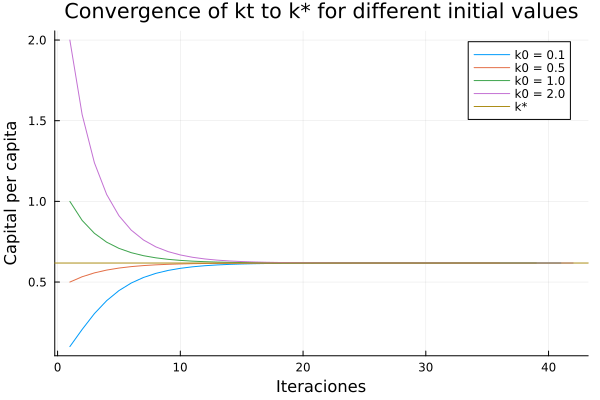

In [19]:
#6
# simulación de la convergencia hacia k^* con un valor inicial específico de k_0
function simulate(p, k0; tol=1e-6, max_iter=1000)
    k_t = k0
    k_s = kstar(p)
    
    k_valores = [k_t]
    iter = 0

    while abs(k_t - k_s) > tol && iter < max_iter
        k_t = g(p, k_t)
        push!(k_valores, k_t)
        iter += 1
    end

    return k_valores, iter
end

p = params()

# Valores iniciales de capital per capita
initial_values = [0.1, 0.5, 1.0, 2.0]

# Almacenar los resultados de las simulaciones
all_k_valores = []

for k0 in initial_values
    k_valores, iter = simulate(p, k0)
    push!(all_k_valores, (k0, k_valores, iter))
end


function plot_convergence_multiple(all_k_valores, k_s)
    plot(title="Convergence of kt to k* for different initial values", xlabel="Iteraciones", ylabel="Capital per capita")
    for (k0, k_valores, _) in all_k_valores
        plot!(k_valores, label="k0 = $k0")
    end
    hline!([k_s], label="k*")
end

# Graficar la convergencia
plot_convergence_multiple(all_k_valores, kstar(p))

In [20]:
#7# simulación de la convergencia hacia k^* con un valor inicial específico de k_0

function simulate(p, k0; tol=1e-6, max_iter=1000)
    k_t = k0
    k_s = kstar(p)
    
    k_valores = [k_t]
    iter = 0

    while abs(k_t - k_s) > tol && iter < max_iter
        k_t = g(p, k_t)
        push!(k_valores, k_t)
        iter += 1
    end

    return k_valores, iter
end

# Definir los valores de n
n_values = [0.0, 0.1, 1.0]

# Almacenar los resultados de las simulaciones
all_n_simulations = []

for n in n_values
    p = params(n=n)
    k_valores, iter = simulate(p, p[:x0])
    push!(all_n_simulations, (n, k_valores, iter))
end

# Función para graficar la convergencia para diferentes valores de n
function plot_convergence_multiple_n(all_n_simulations)
    plot(title="Convergence of kt to k* for different values of n", xlabel="Iteraciones", ylabel="Capital per capita")
    for (n, k_valores, _) in all_n_simulations
        plot!(k_valores, label="n = $n")
    end
end

# Graficar la convergencia
plot_convergence_multiple_n(all_n_simulations, )
